# Завдання: побудувати нелінійну регресійну модель за даними.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
class Model:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def slope(self):
        n = len(self.x)
        first_up = n * np.sum(self.x * self.y)
        second_up = np.sum(self.x)*np.sum(self.y)
        up = first_up - second_up
        down = n * np.sum(self.x**2) - (np.sum(self.x))**2
        self.slope_ = up/down

    def intercept(self):
        n = len(self.x)
        up = np.sum(self.x**2) * np.sum(self.y) - np.sum(self.x) * np.sum(self.x * self.y)
        down = n * np.sum(self.x**2) - np.sum(self.x)**2
        self.intercept_ = up/down

    def regression(self):
        self.slope()
        self.intercept()
        self.y_hat = self.intercept_ + self.slope_ * self.x

    def plot(self):
        plt.plot(self.x, self.y_hat, c = 'r')
        plt.scatter(self.x, self.y, c = 'b')
        plt.show()

    def mse(self):
        self.mse = np.mean((self.y - self.y_hat)**2)


### Вхідні дані:

In [4]:
X = np.array([0.09, 0.33, 0.84, 1.07, 1.69, 3.47, 4.71, 5.49, 6.2, 7.89, 8.03, 8.28, 8.36, 11.44, 12.77, 14.07, 15.4])
Y = np.array([45.3, 43.7, 32.1, 30.2, 18.6, 6.84, 2.96, 1.96, 1.26, 0.51, 0.45, 0.39, 0.38, 0.05, 0.03, 0.01, 0.01])

In [5]:
X1 = 1/X
Y1 = 1/Y
lnX = np.log(X)
lnY = np.log(Y)

### Підбір моделі:

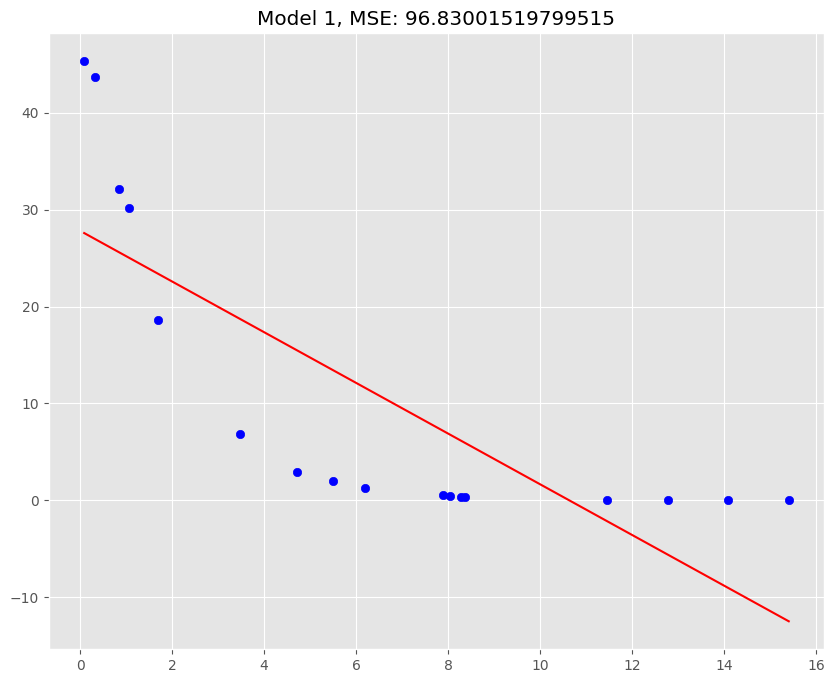

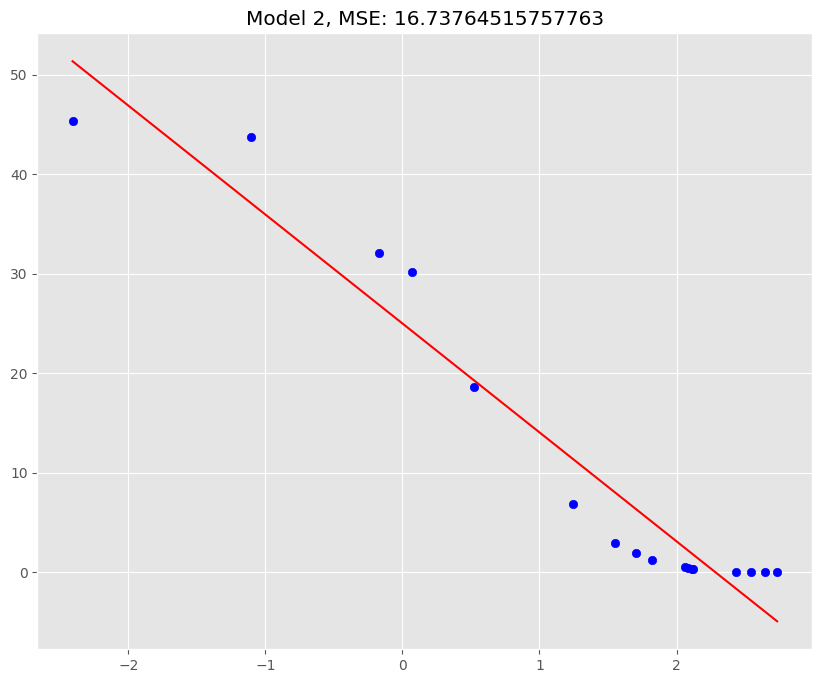

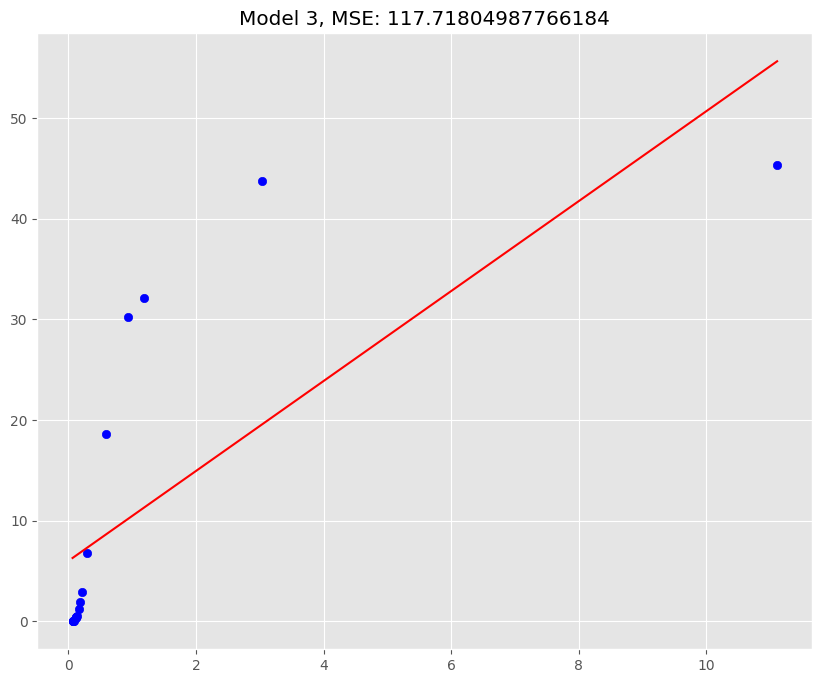

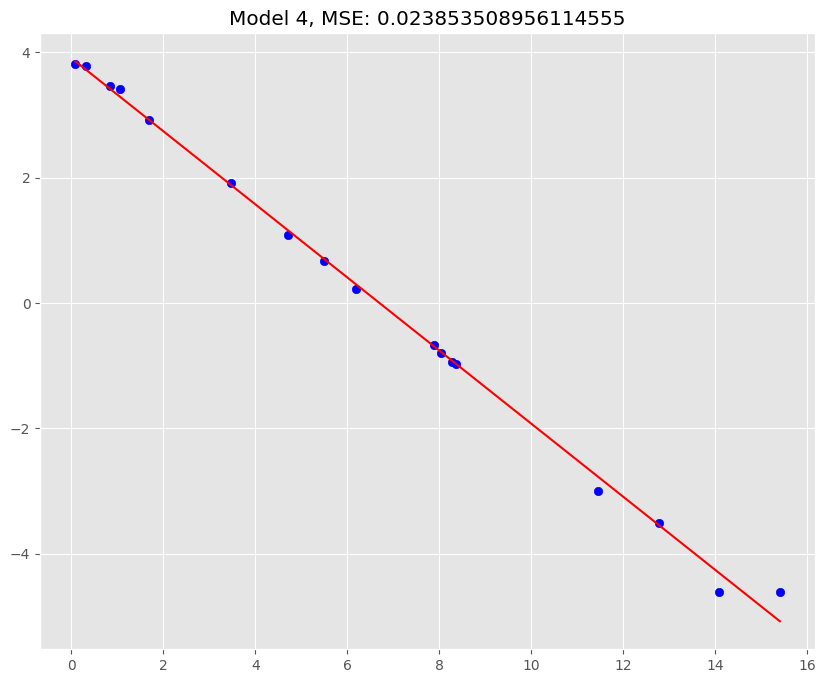

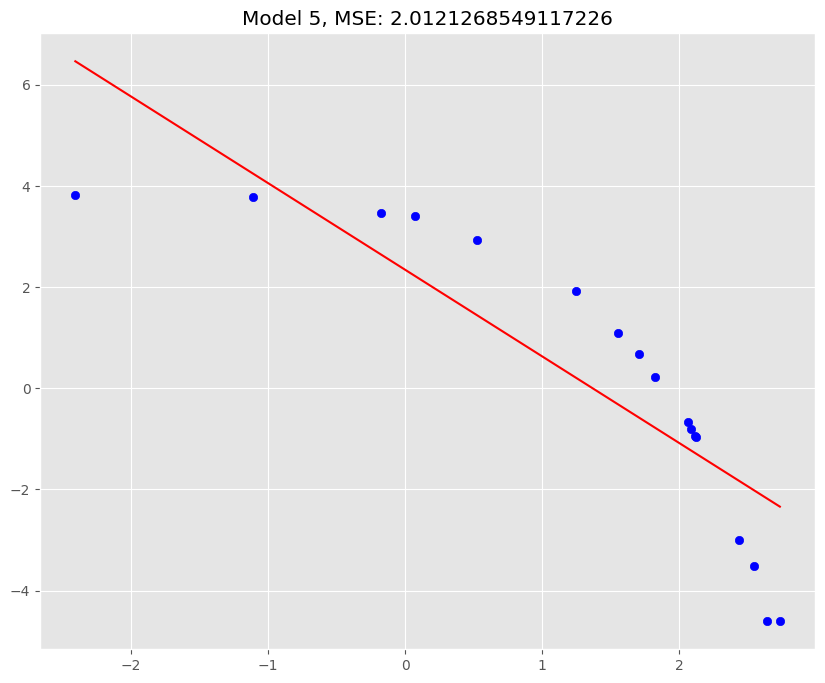

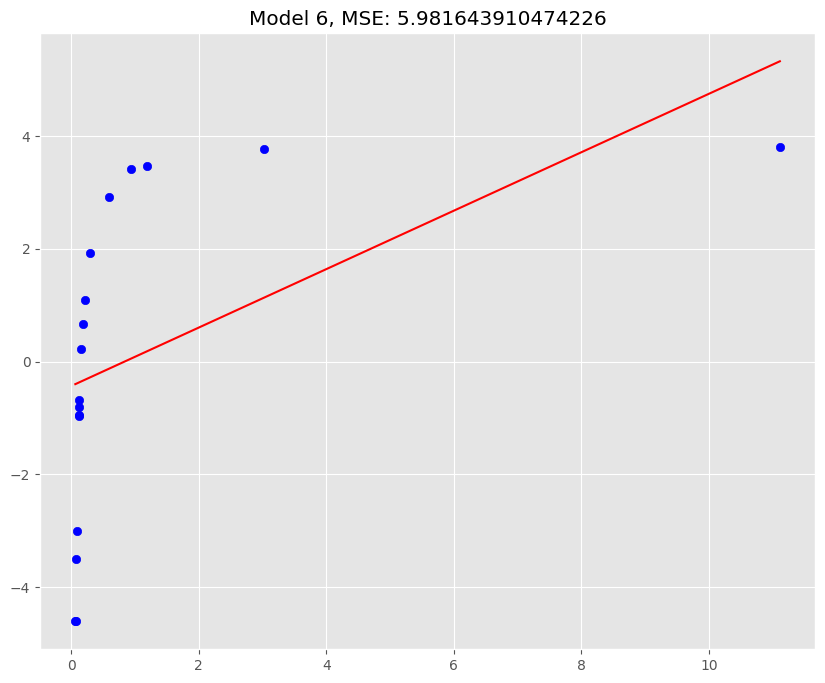

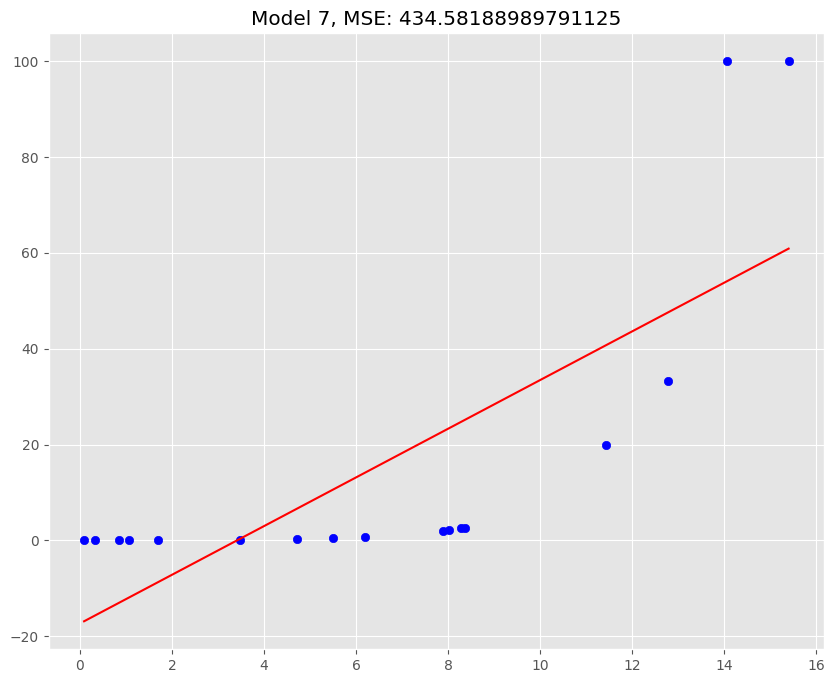

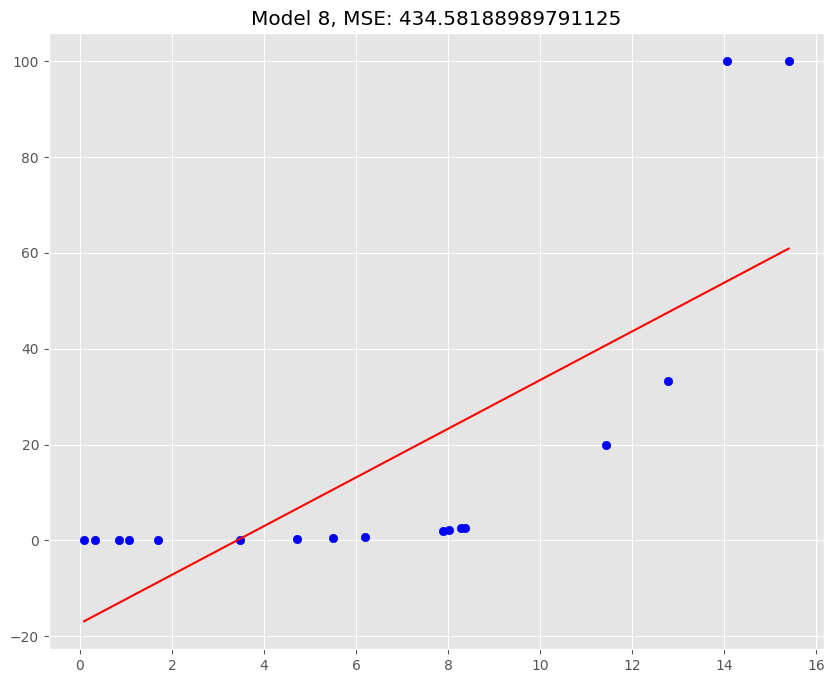

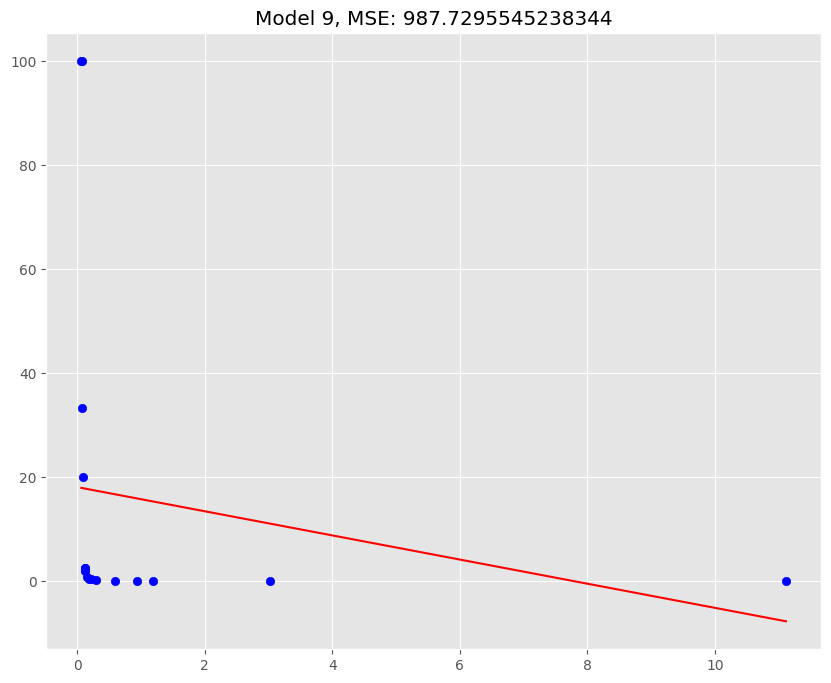

In [6]:
all_cases = ([X, Y], [lnX, Y], [X1, Y], [X, lnY], [lnX, lnY], [X1, lnY], [X, Y1], [X, Y1], [X1, Y1])
mse_list = []

for i, case in enumerate(all_cases):
    case_obj = Model(case[0], case[1])
    case_obj.regression()
    case_obj.mse()
    mse_list.append(case_obj.mse)
    plt.title(f"Model {i+1}, MSE: {case_obj.mse}")
    case_obj.plot()

In [7]:
comparison_df = pd.DataFrame({"mse": mse_list}, index=np.arange(1, 10))
comparison_df

,mse
1,96.830015
2,16.737645
3,117.718050
4,0.023854
5,2.012127
6,5.981644
7,434.581890
8,434.581890
9,987.729555


In [8]:
comparison_df.sort_values(by="mse")

,mse
4,0.023854
5,2.012127
6,5.981644
2,16.737645
1,96.830015
3,117.718050
7,434.581890
8,434.581890
9,987.729555


Отже, отримали, що дані $\ln{Y}$ (модель 4) можна описати за допомогою лінійної регресії найкращим чином.

Модель: $\ln{Y} = a + bX$.

$Y = e^{a + bX}$.

### Візуалізація даних та побудова моделі:

In [9]:
print("Матриця кореляції Х та log(Y):")
np.corrcoef(X, np.log(Y))

Матриця кореляції Х та log(Y):


array([[ 1.        , -0.99847085],
       [-0.99847085,  1.        ]])

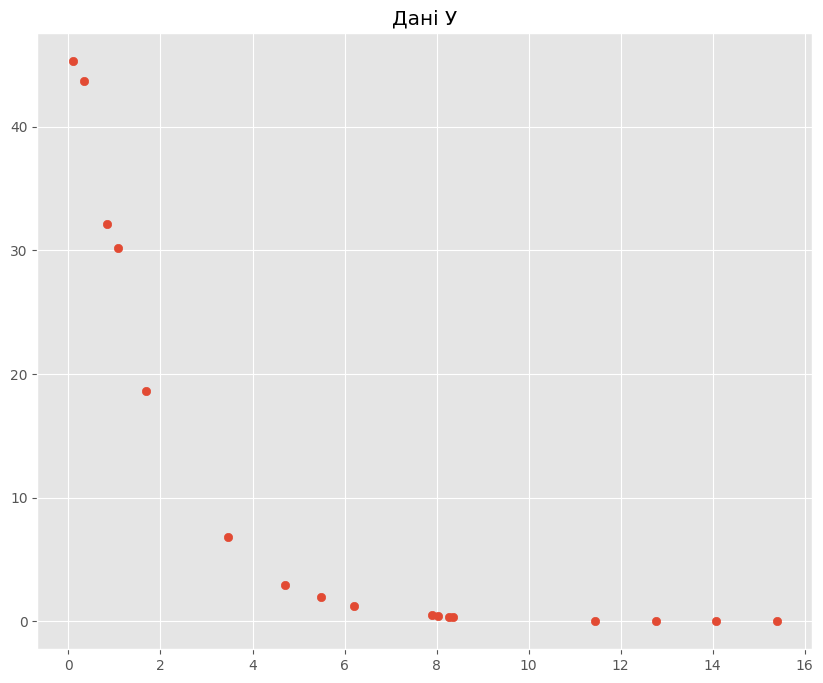

In [10]:
plt.scatter(X, Y)
plt.title("Дані У")
plt.show()

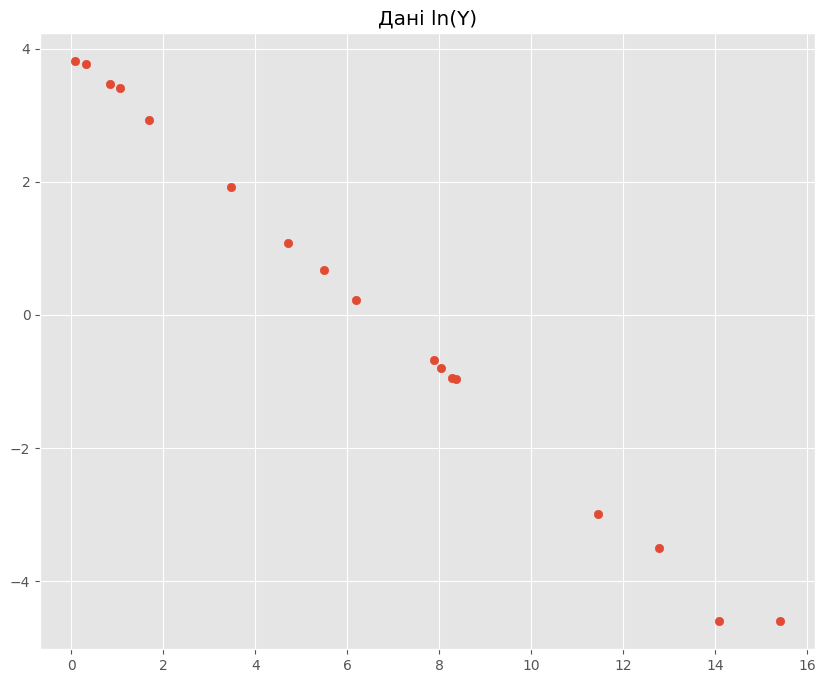

In [11]:
plt.scatter(X, np.log(Y))
plt.title("Дані ln(Y)")
plt.show()

In [12]:
model = Model(X, np.log(Y))
model.regression()
print(f"Модель з a={model.intercept_} та b={model.slope_}.")

Модель з a=3.910528638220725 та b=-0.5835840764932484.


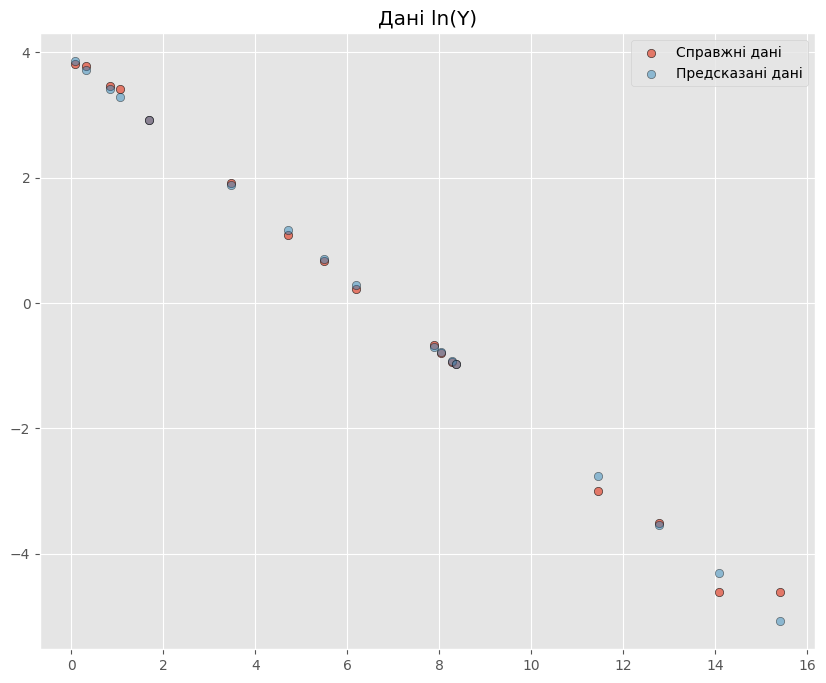

In [13]:
plt.scatter(X, np.log(Y), label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.scatter(X, model.y_hat, label="Предсказані дані", linewidths=0.5, alpha=0.5, edgecolors="black")
plt.title("Дані ln(Y)")
plt.legend()
plt.show()

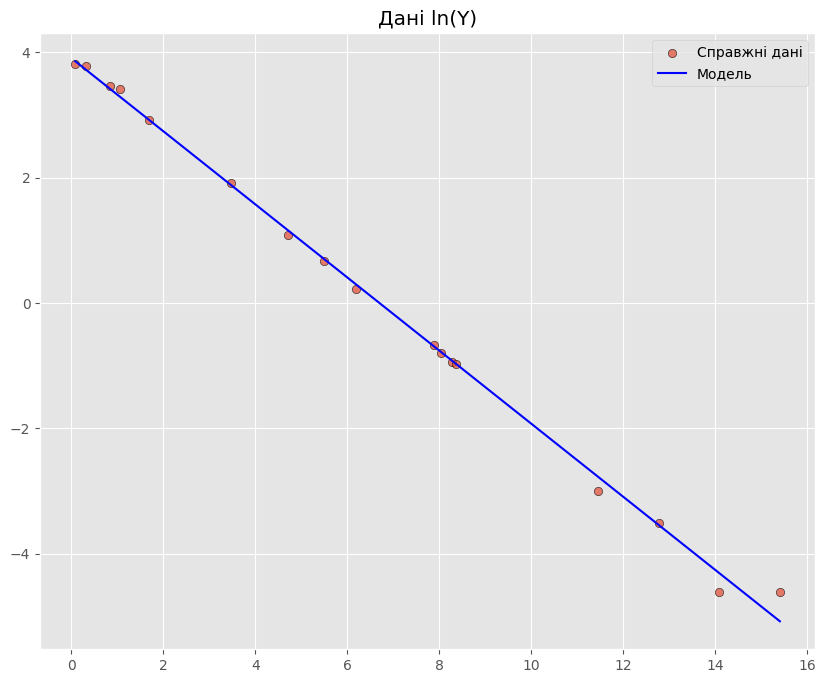

In [14]:
arg = np.linspace(np.min(X), np.max(X), 100)
plt.scatter(X, np.log(Y), label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, model.intercept_ + model.slope_*arg, color="blue", label="Модель")
plt.title("Дані ln(Y)")
plt.legend()
plt.show()

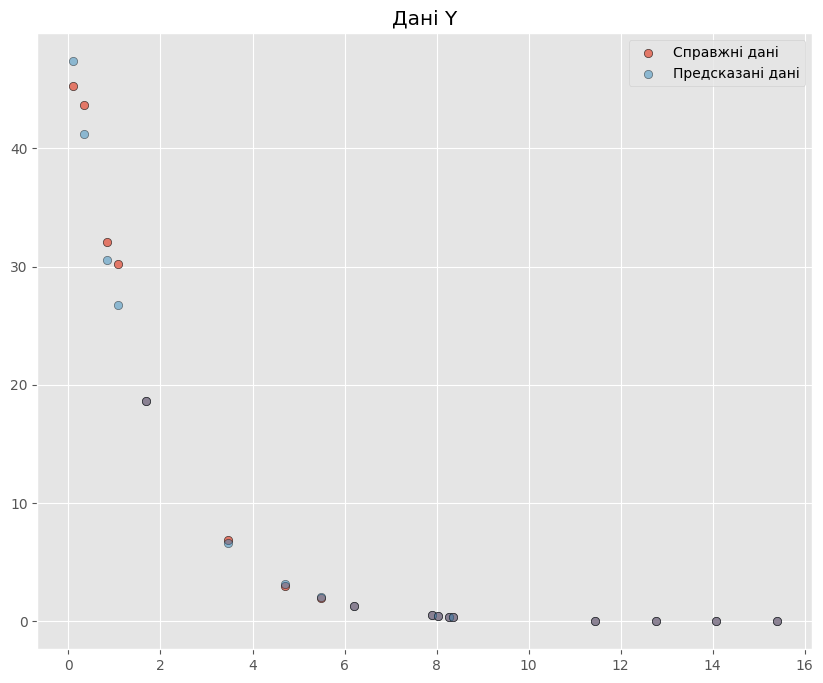

In [15]:
plt.scatter(X, Y, label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.scatter(X, np.exp(model.y_hat), label="Предсказані дані", linewidths=0.5, alpha=0.5, edgecolors="black")
plt.title("Дані Y")
plt.legend()
plt.show()

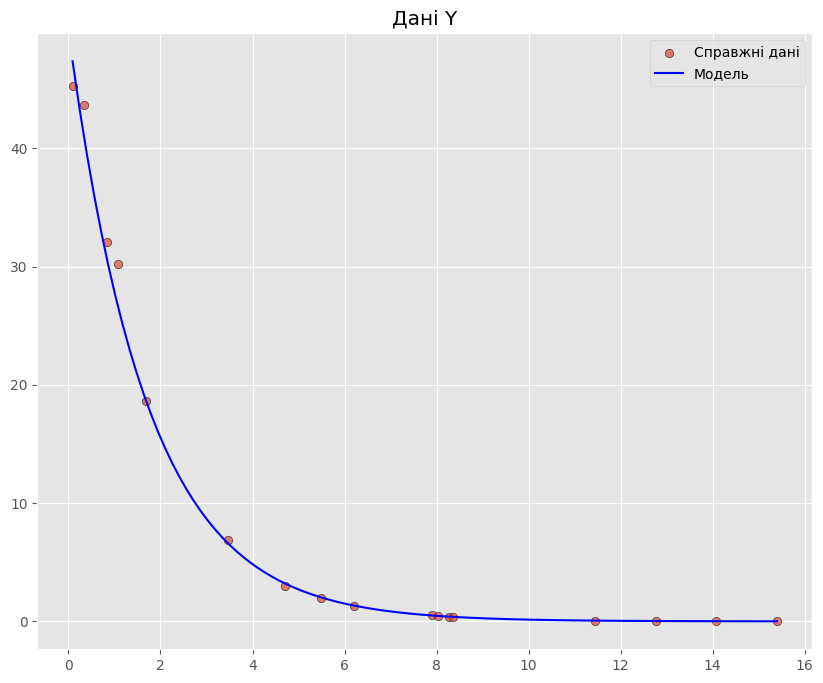

In [16]:
arg = np.linspace(np.min(X), np.max(X), 100)
plt.scatter(X, Y, label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, np.exp(model.intercept_ + model.slope_*arg), color="blue", label="Модель")
plt.title("Дані Y")
plt.legend()
plt.show()

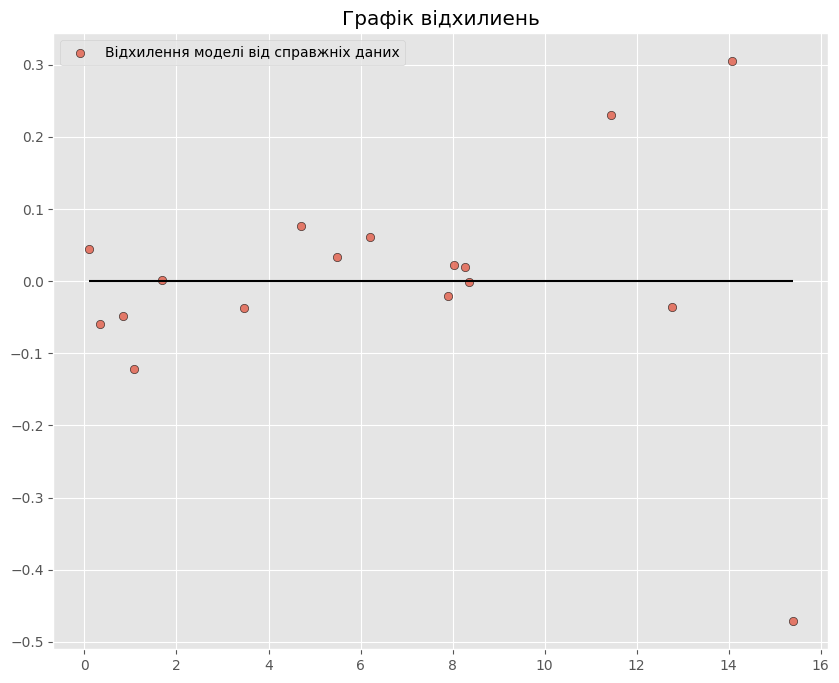

In [17]:
plt.scatter(X, model.y_hat - np.log(Y), label="Відхилення моделі від справжніх даних", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.hlines(0, xmin=np.min(X), xmax=np.max(X), colors="black")
plt.title("Графік відхилиень")
plt.legend()
plt.show()

### Оцінимо статистичну значущість моделі:

In [18]:
u = np.log(Y) - model.y_hat
DW = 0
for i in np.arange(len(X) - 1):
    DW += (u[i+1] - u[i])**2
DW = DW/np.sum(u*u)

In [19]:
r_square = np.var(model.y_hat)/np.var(np.log(Y))
adjusted_r_square = 1 - (1 - r_square)*((len(X) - 1)/(len(X) - 3))
F = ((r_square)/(1 - r_square))*(len(X) - 2)
k = model.slope_*np.mean(X)/np.mean(np.log(Y))
print(f"Коефіцієнт еластичності: {k}.")
print(f"Коефіцієнт детермінації: {r_square}.")
print(f"Скоригований коефіцієнт детермінації: {adjusted_r_square}.")
print(f"Значення F-статистики: {F}.")
print(f"Значення статистики Дарбіна-Уотсона: {DW}.")

Коефіцієнт еластичності: -29.096344031939864.
Коефіцієнт детермінації: 0.9969440310647077.
Скоригований коефіцієнт детермінації: 0.9965074640739517.
Значення F-статистики: 4893.4268582610775.
Значення статистики Дарбіна-Уотсона: 2.217265697786526.


З рівнем значущості 0.05 табличне значення статистики для критерію Фішера становить 3.87, отже можемо зробити висновок про те, що модель є адекватною. Значення статистики Дарбіна-Уотсона лежить в межах від 1.38 до 2.62, отже автокореляція відсутня.

### Оскільки значення коефіцієнтів регресії не є близькими до нуля відносно експоненційної моделі, то всі коефіцієнти є значущими.

### Інтервальне оцінювання:

In [20]:
S = np.sqrt(sum((np.log(Y) - model.y_hat)**2)/(len(X) - 1 - 1))
S

0.16442012290753777

В нашому випадку $t_{\alpha, k} = 1.75$.

In [21]:
t = 1.75
delta_ln_y = t*S/np.sqrt(len(X))*np.sqrt(1 + (X - np.mean(X))/np.var(X))
delta_ln_y

array([0.05923249, 0.05966273, 0.06056686, 0.06097022, 0.06204446,
       0.06503006, 0.06703138, 0.06826021, 0.06935984, 0.07190965,
       0.07211684, 0.07248534, 0.07260286, 0.07699126, 0.07881074,
       0.08054948, 0.08229033])

In [22]:
ln_y_upper_boundary = model.y_hat + delta_ln_y
ln_y_lower_boundary = model.y_hat - delta_ln_y

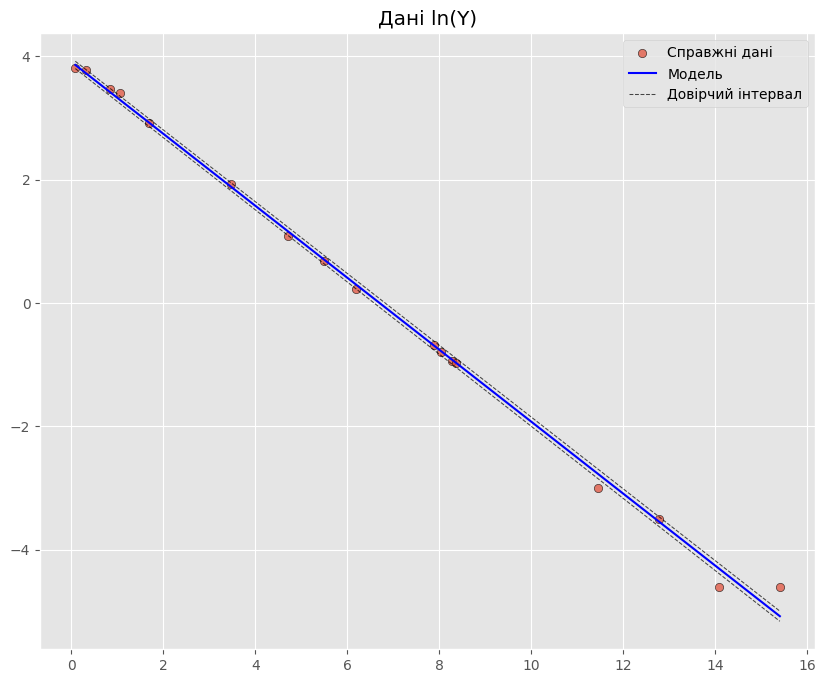

In [23]:
arg = np.linspace(np.min(X), np.max(X), 100)

plt.scatter(X, np.log(Y), label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, model.intercept_ + model.slope_*arg, color="blue", label="Модель")
plt.plot(X, ln_y_lower_boundary, "--", color="black", linewidth=0.75, alpha=0.7, label="Довірчий інтервал")
plt.plot(X, ln_y_upper_boundary, "--", color="black", linewidth=0.75, alpha=0.7)
plt.title("Дані ln(Y)")
plt.legend()
plt.show()

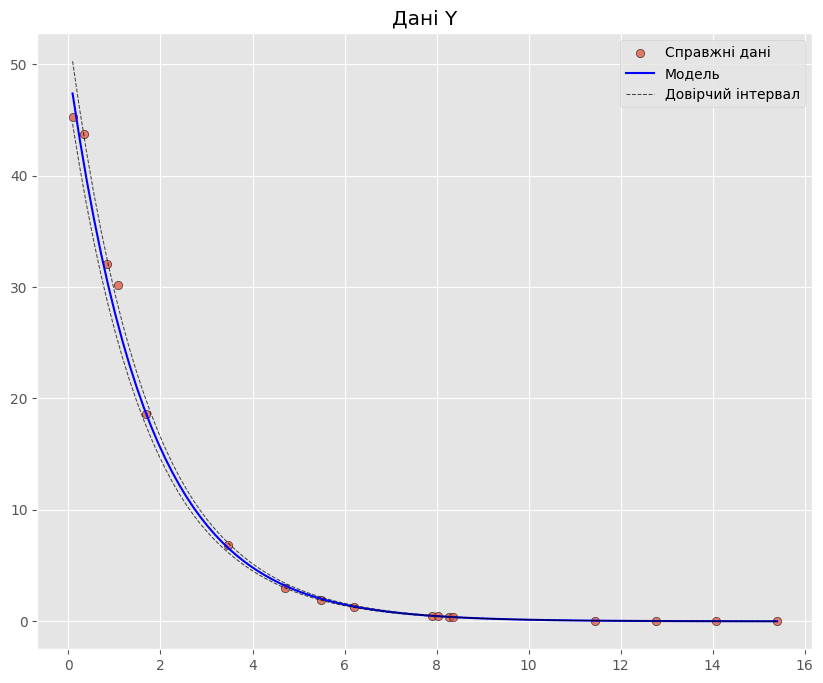

In [24]:
spline_lower = make_interp_spline(X, np.exp(ln_y_lower_boundary))
spline_lower_y = spline_lower(arg)
spline_upper = make_interp_spline(X, np.exp(ln_y_upper_boundary))
spline_upper_y = spline_upper(arg)

plt.scatter(X, Y, label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, np.exp(model.intercept_ + model.slope_*arg), color="blue", label="Модель")
plt.plot(arg, spline_lower_y, "--", color="black", linewidth=0.75, alpha=0.7, label="Довірчий інтервал")
plt.plot(arg, spline_upper_y, "--", color="black", linewidth=0.75, alpha=0.7)
plt.title("Дані Y")
plt.legend()
plt.show()

### Прогнозування та інтервальне оцінювання на основі нових даних:

In [25]:
x_p = []
y_hat_p = []
for k in np.arange(3):
    x_p.append(np.max(X) + (k+1)*(np.max(X) - np.min(X)))
for element in x_p:
    y_hat_p.append(model.intercept_ + model.slope_*element)

predicted_df = pd.DataFrame({"x_new": x_p, "y_predicted": y_hat_p})
predicted_df

,x_new,y_predicted
0,30.71,-14.011338
1,46.02,-22.946011
2,61.33,-31.880683


In [26]:
delta_ln_y_p = t*S*np.sqrt(1 + 1/len(X) + (x_p - np.mean(X))**2/np.sum((X - np.mean(X))**2))
delta_ln_y_p

array([0.46131797, 0.64878402, 0.85378371])

In [27]:
ln_y_p_lower_boundary = y_hat_p - delta_ln_y_p
ln_y_p_upper_boundary = y_hat_p + delta_ln_y_p

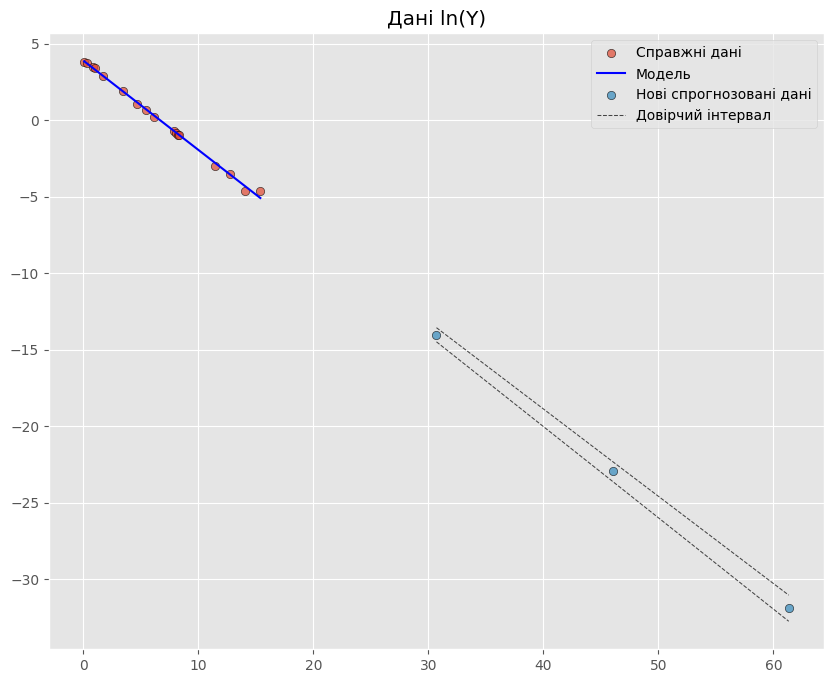

In [28]:
plt.scatter(X, np.log(Y), label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, model.intercept_ + model.slope_*arg, color="blue", label="Модель")
plt.scatter(x_p, y_hat_p, label="Нові спрогнозовані дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(x_p, ln_y_p_lower_boundary, "--", color="black", linewidth=0.75, alpha=0.7, label="Довірчий інтервал")
plt.plot(x_p, ln_y_p_upper_boundary, "--", color="black", linewidth=0.75, alpha=0.7)
plt.title("Дані ln(Y)")
plt.legend()
plt.show()

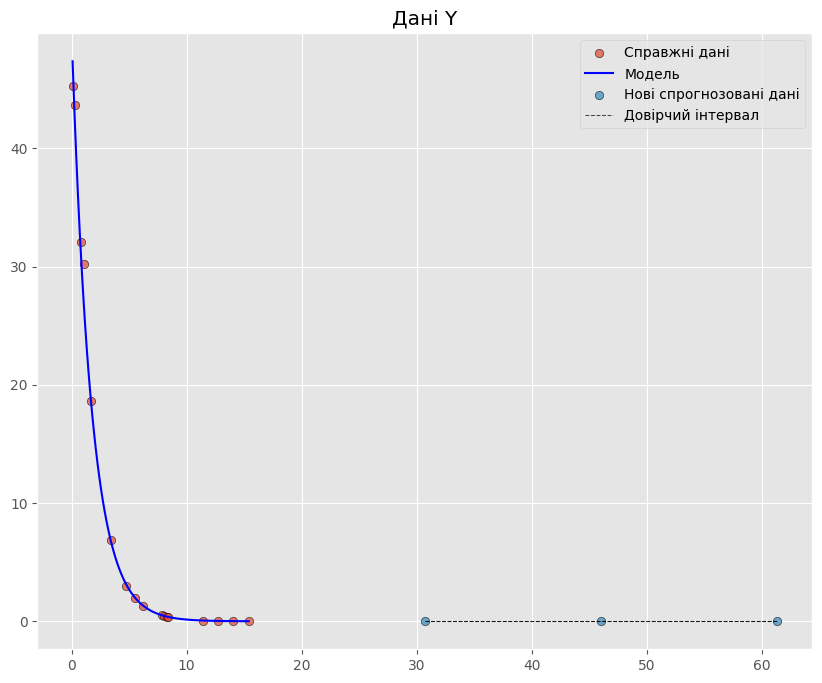

In [29]:
plt.scatter(X, Y, label="Справжні дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(arg, np.exp(model.intercept_ + model.slope_*arg), color="blue", label="Модель")
plt.scatter(x_p, np.exp(y_hat_p), label="Нові спрогнозовані дані", linewidths=0.5, alpha=0.7, edgecolors="black")
plt.plot(x_p, np.exp(ln_y_p_lower_boundary), "--", color="black", linewidth=0.75, alpha=0.7, label="Довірчий інтервал")
plt.plot(x_p, np.exp(ln_y_p_upper_boundary), "--", color="black", linewidth=0.75, alpha=0.7)
plt.title("Дані Y")
plt.legend()
plt.show()